<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/11-House_Price/Nb_11_House_Pricing_feature_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving boston.csv to boston.csv


In [ ]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [3]:
# Read Excel file
df = pd.read_csv("boston.csv")


In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
target = "MEDV"
X = df.drop(columns=["CHAS","RAD", target])
y = df[target]
numeric_df = df.drop(columns=["CHAS","RAD"])

In [6]:
df_clean = numeric_df.copy()

XGBoost Model – Test Data
RMSE: 2.4601
MAE : 1.7961
R²  : 0.9175



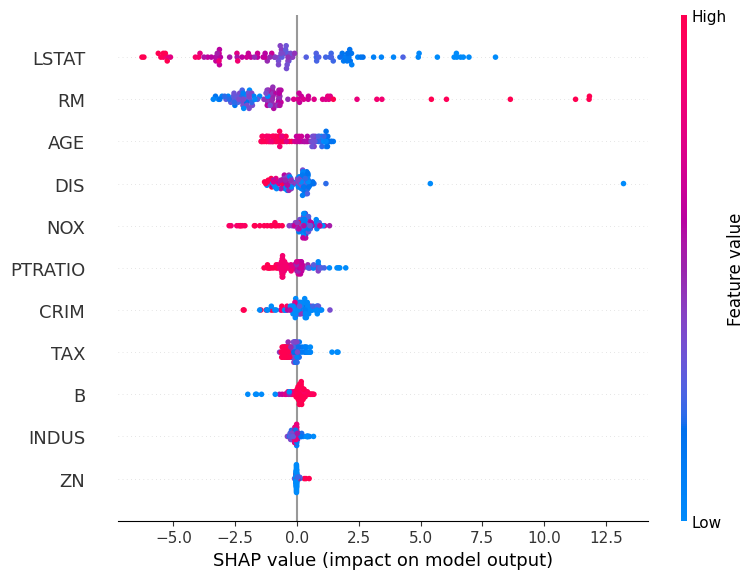

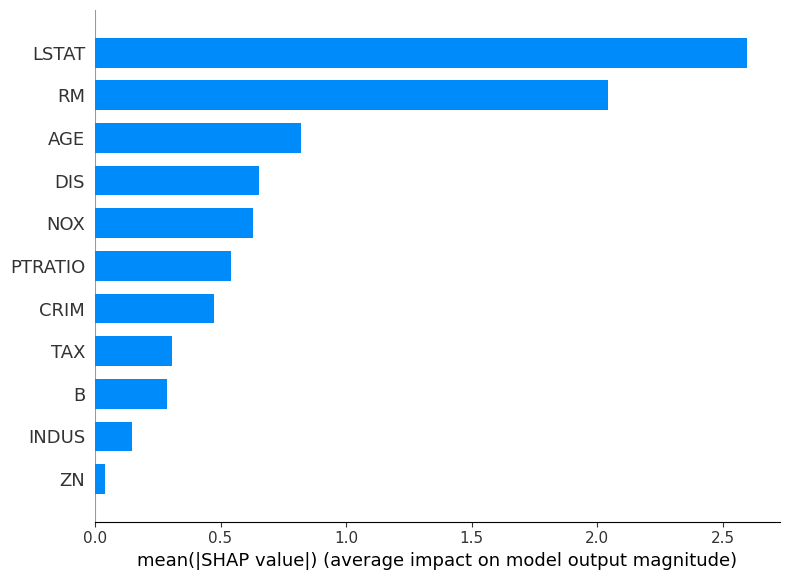

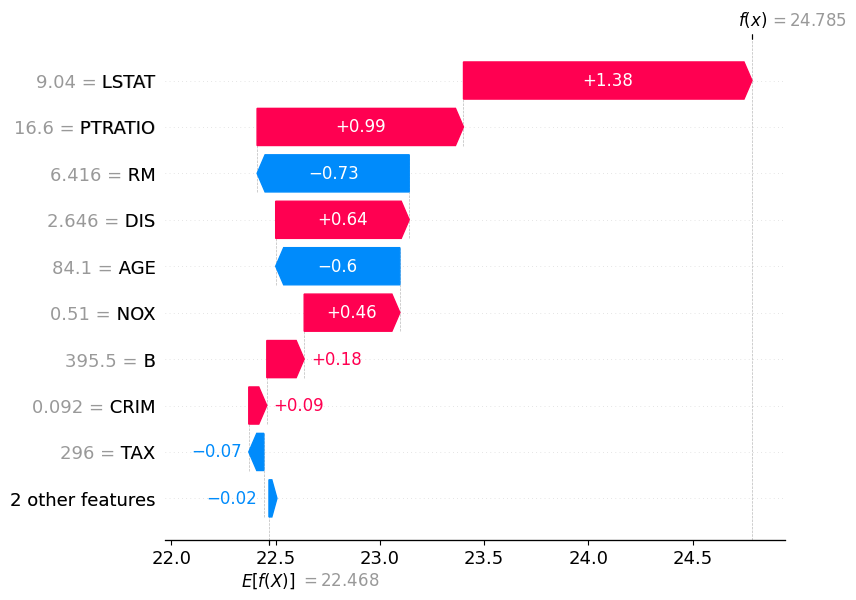

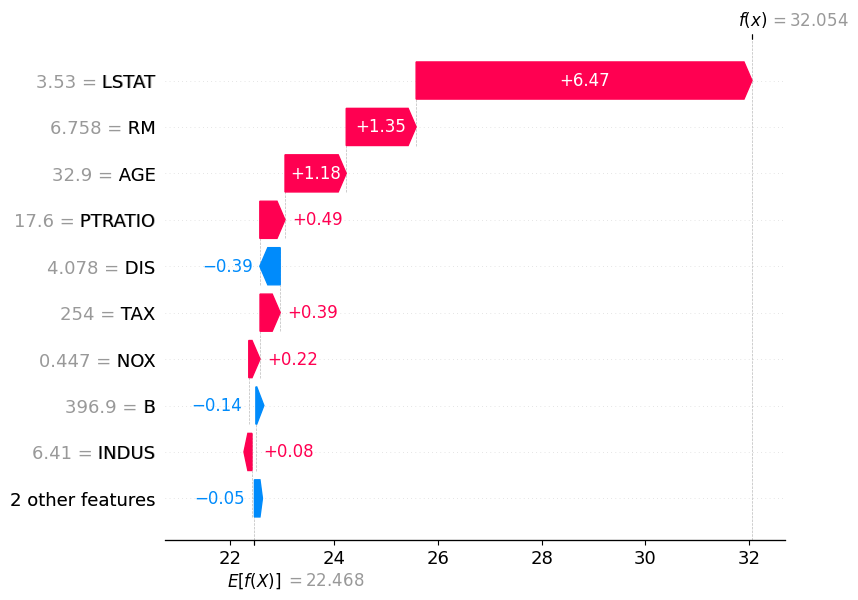

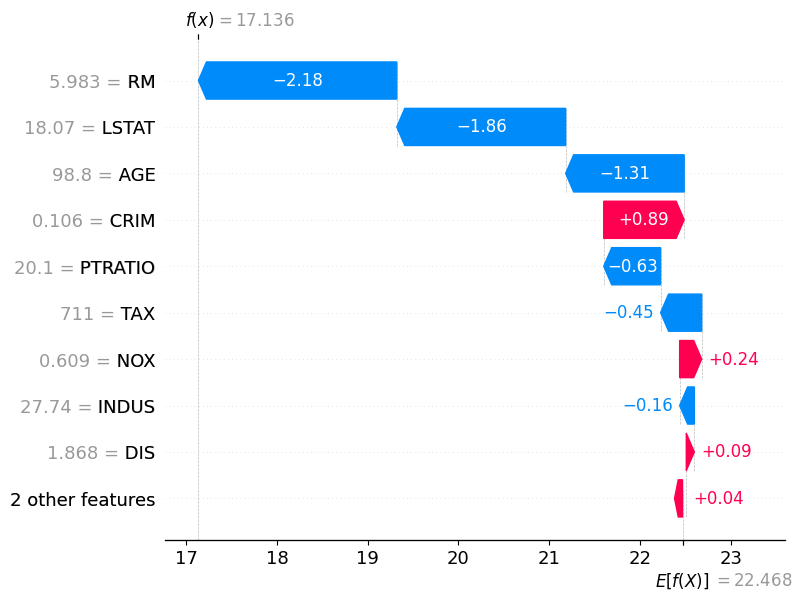

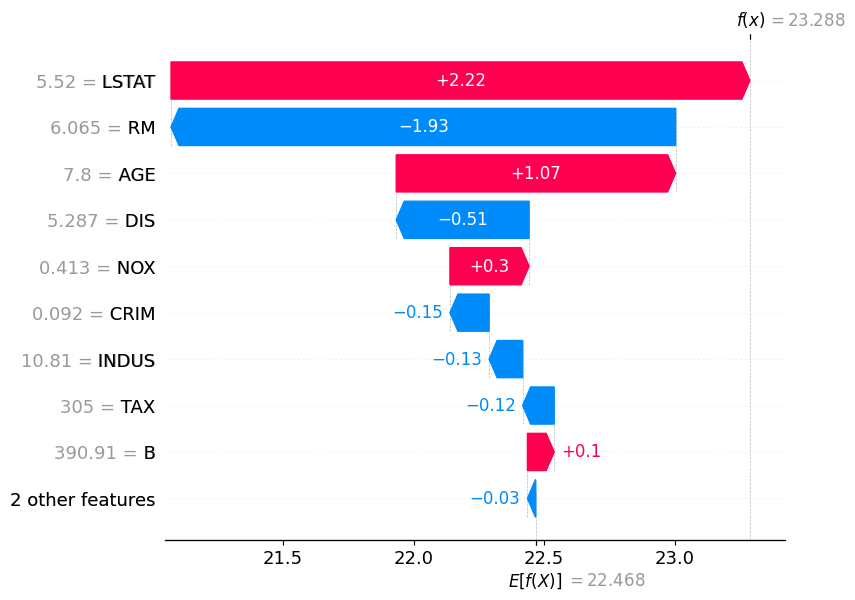

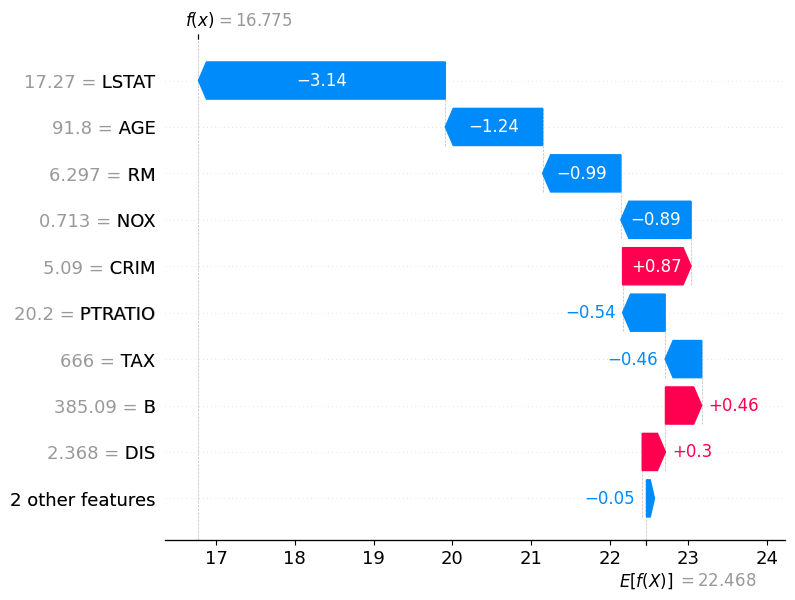

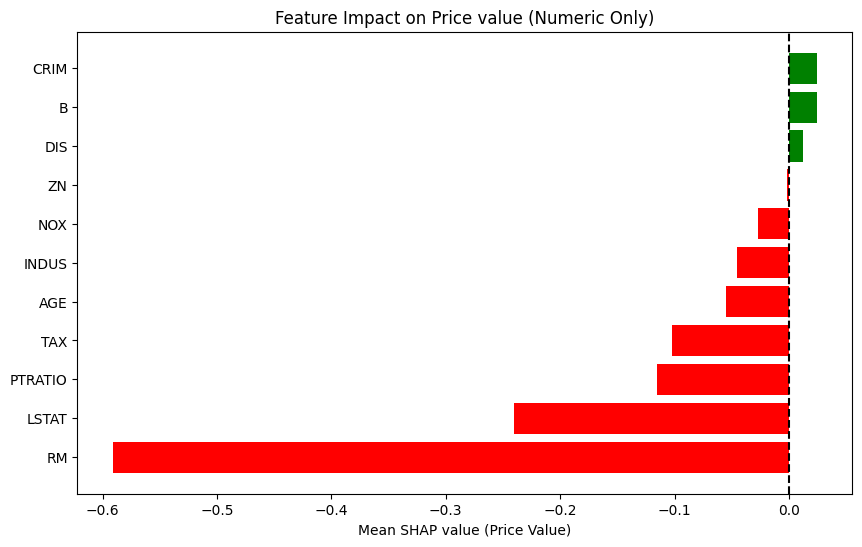

Feature contributions for sample 0
CRIM: Feature Value = 0.09178, SHAP Value = 0.0865113145307987
ZN: Feature Value = 0.0, SHAP Value = -0.01824217623230652
INDUS: Feature Value = 4.05, SHAP Value = -0.006351858351772535
NOX: Feature Value = 0.51, SHAP Value = 0.4592815301101655
RM: Feature Value = 6.416, SHAP Value = -0.7298519353970186
AGE: Feature Value = 84.1, SHAP Value = -0.5959876549115143
DIS: Feature Value = 2.6463, SHAP Value = 0.6406614378290396
TAX: Feature Value = 296.0, SHAP Value = -0.07233596856807707
PTRATIO: Feature Value = 16.6, SHAP Value = 0.990151346324128
B: Feature Value = 395.5, SHAP Value = 0.1793335316912817
LSTAT: Feature Value = 9.04, SHAP Value = 1.384185482315952
Base value: 22.46784168625437
Model prediction: 24.785192
Actual value: 23.6


In [8]:
# 1️⃣ Install packages if needed
!pip install xgboost shap --quiet

# 2️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






# Fill missing numeric values with median
df_clean = df_clean.fillna(df_clean.median())

# 4️⃣ Prepare data

X = df_clean.drop(columns=[target])  # all numeric features now
y = df_clean[target]

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 7️⃣ Predict on test set
y_pred = model.predict(X_test)

# 8️⃣ Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model – Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# 9️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 10️⃣ SHAP summary plot (global feature impact)
shap.summary_plot(shap_values, X_test)

# 11️⃣ SHAP bar plot (average absolute impact)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 12️⃣ Waterfall plot for first 5 test samples
for i in range(min(5, len(X_test))):
    shap.plots.waterfall(shap_values[i])
# 13️⃣ SHAP values DataFrame for further analysis
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['base_value'] = shap_values.base_values
shap_df['predicted_value'] = y_pred
shap_df['actual_value'] = y_test.values
shap_df.to_csv("boston.csv", index=False)

# 14️⃣ Horizontal bar plot showing mean SHAP values
mean_shap = shap_df[X_test.columns].mean().sort_values()
plt.figure(figsize=(10,6))
colors = ['red' if val < 0 else 'green' for val in mean_shap]
plt.barh(mean_shap.index, mean_shap.values, color=colors)
plt.xlabel("Mean SHAP value (Price Value)")
plt.title("Feature Impact on Price value (Numeric Only)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# 15️⃣ Example: Feature contributions for first test sample
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_shap_values = shap_values.values[sample_index]
print("Feature contributions for sample", sample_index)
for feature, value, shap_val in zip(X_test.columns, sample_features, sample_shap_values):
    print(f"{feature}: Feature Value = {value}, SHAP Value = {shap_val}")
print("Base value:", shap_values.base_values[sample_index])
print("Model prediction:", y_pred[sample_index])
print("Actual value:", y_test.values[sample_index])